In [235]:
import h5py
from PIL import Image #It is a preferred image manipulation tool. In Python 3,
# Pillow python library which is nothing but the upgradation of PIL only.
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import os, sys
from fns import *


In [203]:
Train_x_set = np.full((1, 200,200,3), 0)  #Initialize array for images array records


In [285]:
Test_x_set = np.full((1, 200,200,3), 0)  #Initialize array for images array records

In [204]:
hp_train = h5py.File('Train_Datasets.h5', 'w')   # H5py file for train datsets
hp_test = h5py.File('Test_Datasets.h5', 'w')     # H5py file for test datsets

In [205]:
benign_train_path = "C:/Users/bahaa/Breast Cancer Project/Dataset/benign/train_set/"
benign_train = os.listdir(benign_train_path)
trainB_y = [1]*len(benign_train)     # Create list of 1 with length of benign_train records
classesB = ['Benign']*len(benign_train)     # Create list of benign class with length of benign_train records
print(len(benign_train))

malignant_train_path = "C:/Users/bahaa/Breast Cancer Project/Dataset/malignant/train_set/"
malignant_train = os.listdir(malignant_train_path)
trainM_y = [0]*len(malignant_train) # Create list of 0 with length of malignant_train records
classesM = ['Malignant']*len(malignant_train)     # Create list of malignant class with length of benign_train records
len(malignant_train)

Train_y_set = [*trainB_y, *trainM_y]   # astreisk * sign to unpack the list elements
classes_train = [*classesB, *classesM]   # astreisk * sign to unpack the list elements

ascii_classes_List = [n.encode("ascii", "ignore") for n in classes_train]  # Must be encoded as hdf5 cannot 
# understand normal numpy strings


350


In [286]:
benign_test_path = "C:/Users/bahaa/Breast Cancer Project/Dataset/benign/test_set/"
benign_test = os.listdir(benign_test_path)
trainB_y = [1]*len(benign_test)     # Create list of 1 with length of benign_train records
print(len(benign_test))

malignant_test_path = "C:/Users/bahaa/Breast Cancer Project/Dataset/malignant/test_set/"
malignant_test = os.listdir(malignant_test_path)
trainM_y = [0]*len(malignant_test) # Create list of 0 with length of malignant_train records
print(len(malignant_test))

Test_y_set = [*trainB_y, *trainM_y]   # astreisk * sign to unpack the list elements

86
50


In [206]:
for item in benign_train:
    with Image.open(benign_train_path+item) as im:
        img_array = np.array(im)
        img_array = img_array[np.newaxis, :,:,:] #Convert 3dim to 4 dim array (records)
        Train_x_set = np.append(Train_x_set, img_array, axis = 0)  # axis 3 for the 4rth dim cloumn 
        im.close()
for item in malignant_train:
    with Image.open(malignant_train_path+item) as im:
        img_array = np.array(im)
        img_array = img_array[np.newaxis, :,:,:] #Convert 3dim to 4 dim array (records)
        Train_x_set = np.append(Train_x_set, img_array, axis = 0)  # axis 3 for the 4rth dim cloumn 
        im.close()

In [287]:
for item in benign_test:
    with Image.open(benign_test_path+item) as im:
        img_array = np.array(im)
        img_array = img_array[np.newaxis, :,:,:] #Convert 3dim to 4 dim array (records)
        Test_x_set = np.append(Test_x_set, img_array, axis = 0)  # axis 3 for the 4rth dim cloumn 
        im.close()
for item in malignant_test:
    with Image.open(malignant_test_path+item) as im:
        img_array = np.array(im)
        img_array = img_array[np.newaxis, :,:,:] #Convert 3dim to 4 dim array (records)
        Test_x_set = np.append(Test_x_set, img_array, axis = 0)  # axis 3 for the 4rth dim cloumn 
        im.close()

In [207]:
hp_train.create_dataset('Train_x_set', data= Train_x_set[1:])  # Create train_x_set dataset in the h5py file
# first element is zeros

<HDF5 dataset "Train_x_set": shape (510, 200, 200, 3), type "<i4">

In [288]:
hp_train.create_dataset('Test_x_set', data= Test_x_set[1:])  # Create train_x_set dataset in the h5py file

<HDF5 dataset "Test_x_set": shape (136, 200, 200, 3), type "<i4">

In [208]:
hp_train.create_dataset('Train_y_set', data= Train_y_set)  # Create train_y_set dataset in the h5py file


<HDF5 dataset "Train_y_set": shape (510,), type "<i4">

In [289]:
hp_train.create_dataset('Test_y_set', data= Test_y_set)  # Create train_y_set dataset in the h5py file

<HDF5 dataset "Test_y_set": shape (136,), type "<i4">

In [209]:
hp_train.create_dataset('classes_train', data= ascii_classes_List)  # Create train_y_set dataset in the h5py file

<HDF5 dataset "classes_train": shape (510,), type "|S9">

In [224]:
train_x_orig = np.array(hp_train["Train_x_set"][:])
train_set_y = np.array(hp_train["Train_y_set"][:]) 
classes = np.array(hp_train["classes_train"][:]) # the list of classes


In [290]:
test_x_orig = np.array(hp_train["Test_x_set"][:])
test_set_y = np.array(hp_train["Test_y_set"][:]) 

In [225]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_set_y.shape))


Number of training examples: 510
Each image is of size: (200, 200, 3)
train_x_orig shape: (510, 200, 200, 3)
train_y shape: (510,)


In [293]:
# Explore your dataset 
m_test = test_x_orig.shape[0]
num_px = test_set_y.shape[0]

print ("Number of test examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_set_y.shape))


Number of test examples: 136
Each image is of size: (136, 136, 3)
test_x_orig shape: (136, 200, 200, 3)
test_y shape: (136,)


y = 1. It's a Benign picture.


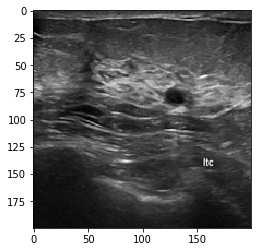

In [233]:
# Example of a picture
index = 100
plt.imshow(train_x_orig[index])
print ("y = " + str(train_set_y[index]) + ". It's a " + classes[index].decode("ascii") +  " picture.")

In [234]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
#test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
#test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
#print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (120000, 510)


In [294]:
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
test_x = test_x_flatten/255
print ("test_x's shape: " + str(test_x.shape))

test_x's shape: (120000, 136)


In [236]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 120000     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [278]:

X = train_x
Y = train_set_y
num_iterations = 2000
print_cost=True

np.random.seed(1)
grads = {}
costs = []                              # to keep track of the cost
m = X.shape[1]                           # number of examples
(n_x, n_h, n_y) = layers_dims

# Initialize parameters dictionary, by calling one of the functions you'd previously implemented
#(≈ 1 line of code)
# parameters = ...
# YOUR CODE STARTS HERE
parameters = initialize_parameters(n_x, n_h, n_y)
# YOUR CODE ENDS HERE

# Get W1, b1, W2 and b2 from the dictionary parameters.
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

# Loop (gradient descent)

for i in range(0, num_iterations):

    # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
    #(≈ 2 lines of code)
    # A1, cache1 = ...
    # A2, cache2 = ...
    # YOUR CODE STARTS HERE
    A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
    A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
    # YOUR CODE ENDS HERE

    # Compute cost
    #(≈ 1 line of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    m = Y.shape[0]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(A2).T) - np.dot(1-Y, np.log(1-A2).T))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    # YOUR CODE ENDS HERE

    # Initializing backward propagation
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

    # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
    #(≈ 2 lines of code)
    # dA1, dW2, db2 = ...
    # dA0, dW1, db1 = ...
    # YOUR CODE STARTS HERE
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
    # YOUR CODE ENDS HERE

    # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2

    # Update parameters.
    #(approx. 1 line of code)
    parameters = update_parameters(parameters, grads, learning_rate)
    # YOUR CODE STARTS HERE


    # YOUR CODE ENDS HERE

    # Retrieve W1, b1, W2, b2 from parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Print the cost every 100 iterations
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
        print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iterations:
        costs.append(cost)



Cost after iteration 0: 0.6854034927859395
Cost after iteration 100: 0.5148640200352117
Cost after iteration 200: 0.47548658163402546
Cost after iteration 300: 0.434326624703662
Cost after iteration 400: 0.4072721368650354
Cost after iteration 500: 0.3803315964965862
Cost after iteration 600: 0.3560888183869984
Cost after iteration 700: 0.33475282164895726
Cost after iteration 800: 0.32145380189097295
Cost after iteration 900: 0.29711907281767136
Cost after iteration 1000: 0.2220709819468489
Cost after iteration 1100: 0.14167497012425218
Cost after iteration 1200: 0.1250275707051798
Cost after iteration 1300: 0.12750538544301668
Cost after iteration 1400: 1.0525577572198057
Cost after iteration 1500: 0.07757911494256302
Cost after iteration 1600: 0.064002229761632
Cost after iteration 1700: 0.04954796477830355
Cost after iteration 1800: 0.03646988520311604
Cost after iteration 1900: 0.029299187828709553
Cost after iteration 1999: 0.024324332509235106


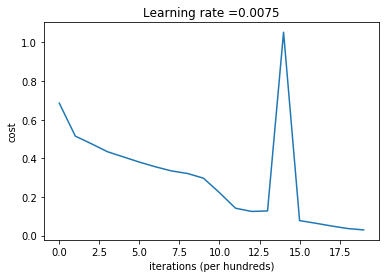

In [280]:
plot_costs(costs, learning_rate)

In [281]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9980392156862745


In [295]:
predictions_test = predict(test_x, test_set_y, parameters)

Accuracy: 0.6544117647058824


In [1]:
layers_dims = [120000, 20, 7, 5, 1] #  4-layer model

In [3]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        AL, caches = L_model_forward(X, parameters)
        
        # YOUR CODE ENDS HERE
        
        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        m = Y.shape[0]

        # Compute loss from aL and y.
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

        
        # YOUR CODE ENDS HERE
    
        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...    
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, caches)
        
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [4]:
parameters, costs = L_layer_model(train_x, train_set_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))


NameError: name 'train_x' is not defined

In [ ]:
parameters, costs = L_layer_model(train_x, train_set_y, layers_dims, num_iterations = 1000, print_cost = True)

Cost after iteration 0: 0.6848009743813122
Cost after iteration 100: 0.4930645802250646
Cost after iteration 200: 0.45038359890629104
Cost after iteration 300: 0.41368011764697515
Cost after iteration 400: 0.38816179166500797
Cost after iteration 500: 0.36192961362755244
Cost after iteration 600: 0.3365825154456332
Cost after iteration 700: 0.31288837205820735
Cost after iteration 800: 0.36258635456119004
Cost after iteration 900: 0.3721271946676443


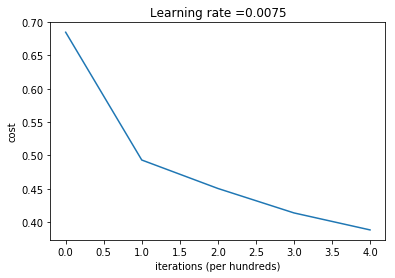

In [312]:
plot_costs(costs, learning_rate)

In [313]:
pred_train = predict(train_x, train_set_y, parameters)

Accuracy: 0.8372549019607842


In [314]:
pred_test = predict(test_x, test_set_y, parameters)

Accuracy: 0.7279411764705883
